In [52]:
import torch
from torchviz import make_dot

######################################################################
# 1. Define the function and give initial values to the parameters
######################################################################

# Define the function to minimize: f(x) = 3x^2 + 2x 
# (Derivative is 6x + 2, minium is at x = -1/3)
def f(x):
    return 3*x**2 + 2*x 

# Give an initial value for the variable x
x = torch.tensor([7.0], requires_grad=True)

In [53]:
######################################################################
# 2. Inspect the computation graph
######################################################################

# When we evaluate f with an input marked "requires_grad=True", Pytorch builds a
# graph with all of the component functions of f. For f(x) = 3x^2 + 2x, the
# graph should have 4 nodes: 1 for the exponent, 2 for the multiplications,
# and 1 for the addition. We can inspect the graph using the grad_fn attribute:
print("Last function in graph:", f(x).grad_fn)

Last function in graph: <AddBackward0 object at 0x00000235161B0A90>


In [54]:
print("Preceding functions:", f(x).grad_fn.next_functions)

Preceding functions: ((<MulBackward0 object at 0x00000235160B8940>, 0), (<MulBackward0 object at 0x00000235160B8790>, 0))


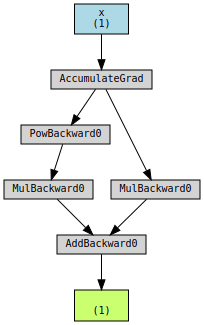

In [55]:
# Print the full graph
graph = make_dot(f(x), params={'x': x})
# graph.render('graph', format='pdf')
graph

In [56]:
# backward() computes the chain rule for all the component functions of f,
# evaluates this at the current value of x, and stores the result in x.grad
f(x).backward()

# Check if pytorch computed the derivative we expected
print("Is the derivative 6x + 2?", 6*x + 2 == x.grad)

Is the derivative 6x + 2? tensor([True])


In [57]:
#####################################################################
# 3. Perform gradient descent
#####################################################################

# Choose Stochastic Gradient Descent as the optimization algorithm
optimizer = torch.optim.SGD(params=[x], lr=0.1)

# Print initial values
print(f"Initial values: f(x) = {f(x).item():.4f}, x = {x.item():.4f}")

for i in range(15):
    # Use backward() to compute the gradient of f at the current value of x
    f(x).backward()
    
    # Update the variable x using the SGD optimizer
    # (Subtract the gradient from the current value of x)
    optimizer.step()
    
    # Zero the gradient for the next iteration
    optimizer.zero_grad()
    
    # Print current values
    print(f"Iteration {i+1}: f(x) = {f(x).item():.4f}, x = {x.item():.4f}")

Initial values: f(x) = 161.0000, x = 7.0000
Iteration 1: f(x) = 6.1200, x = -1.8000
Iteration 2: f(x) = 0.6992, x = -0.9200
Iteration 3: f(x) = -0.1681, x = -0.5680
Iteration 4: f(x) = -0.3069, x = -0.4272
Iteration 5: f(x) = -0.3291, x = -0.3709
Iteration 6: f(x) = -0.3327, x = -0.3484
Iteration 7: f(x) = -0.3332, x = -0.3393
Iteration 8: f(x) = -0.3333, x = -0.3357
Iteration 9: f(x) = -0.3333, x = -0.3343
Iteration 10: f(x) = -0.3333, x = -0.3337
Iteration 11: f(x) = -0.3333, x = -0.3335
Iteration 12: f(x) = -0.3333, x = -0.3334
Iteration 13: f(x) = -0.3333, x = -0.3334
Iteration 14: f(x) = -0.3333, x = -0.3333
Iteration 15: f(x) = -0.3333, x = -0.3333
